# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
from pydataset import data

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Custom
import env
import wrangle_prep as wp

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = data('iris')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
train, validate, test = wp.split_data(df)

train <> (84, 5)
validate <> (36, 5)
test <> (30, 5)


In [4]:
scaler = MinMaxScaler()
    
num_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()
    
scaler.fit(train[num_columns])
    
train_scaled[num_columns] = scaler.transform(train[num_columns])
validate_scaled[num_columns] = scaler.transform(validate[num_columns])
test_scaled[num_columns] = scaler.transform(test[num_columns])

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((84, 5), (36, 5), (30, 5))

# Exercise 1

Clustering with the Iris Dataset

#### Using this lesson as a guide, perform clustering on the iris dataset.

   - Choose features other than the ones used in the lesson.
   - Visualize the results of your clustering.
   - Use the elbow method to visually select a good value for k.
   - Repeat the clustering, this time with 3 different features.




#### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

#### How does scaling impact the results of clustering?

   - Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually. 

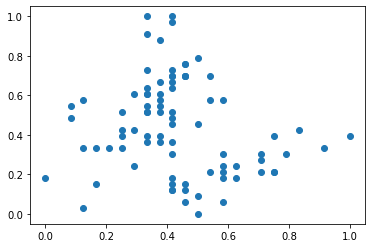

In [9]:
plt.scatter(data=train_scaled, x='sepal_width', y='sepal_length')
plt.show()

In [10]:
cols = ['sepal_width', 'sepal_length']
x = train_scaled[cols]
kmeans = KMeans(n_clusters=3).fit(x)

In [11]:
train['cluster'] = kmeans.predict(x)
train.cluster = train.cluster.astype('category')
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
46,4.8,3.0,1.4,0.3,setosa,0
44,5.0,3.5,1.6,0.6,setosa,0
58,4.9,2.4,3.3,1.0,versicolor,1
76,6.6,3.0,4.4,1.4,versicolor,2
136,7.7,3.0,6.1,2.3,virginica,2


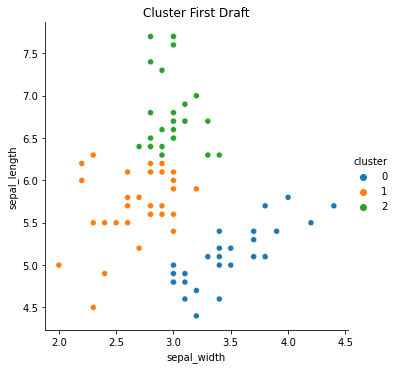

In [30]:
# Visualize
sns.relplot(data=train, y='sepal_length', x='sepal_width', hue='cluster')
plt.title('Cluster First Draft')

plt.show()

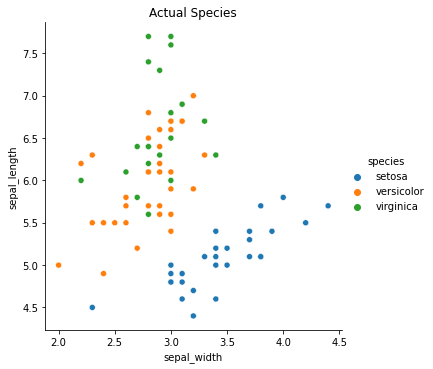

In [31]:
sns.relplot(x='sepal_width', y='sepal_length', data=train, hue='species')
plt.title('Actual Species')
plt.show()

In [14]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.096296,3.481481,1.488889,0.277778
1,5.723333,2.673333,4.233333,1.360000
2,6.777778,2.992593,5.311111,1.877778


### Try with more columns

In [32]:
cols = ['sepal_width', 'sepal_length', 'petal_width']
x = train_scaled[cols]
kmeans = KMeans(n_clusters=3).fit(x)

In [33]:
train['cluster'] = kmeans.predict(x)
train.cluster = train.cluster.astype('category')
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
46,4.8,3.0,1.4,0.3,setosa,1
44,5.0,3.5,1.6,0.6,setosa,1
58,4.9,2.4,3.3,1.0,versicolor,2
76,6.6,3.0,4.4,1.4,versicolor,0
136,7.7,3.0,6.1,2.3,virginica,0


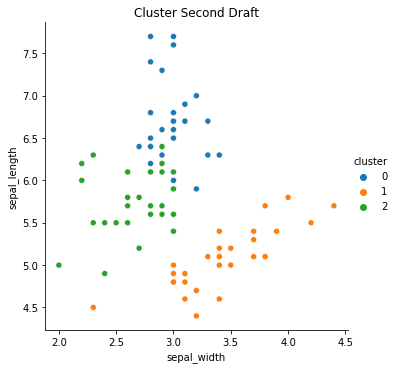

In [38]:
sns.relplot(data=train, y='sepal_length', x='sepal_width', hue='cluster')
plt.title('Cluster Second Draft')

plt.show()

### Use the elbow method to visually select a good value for k

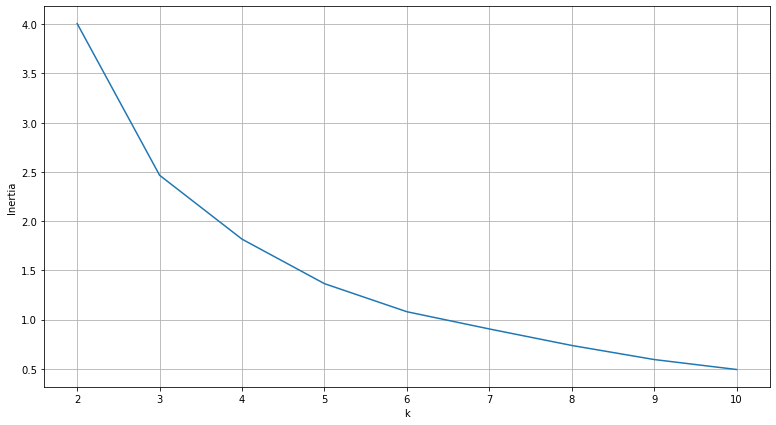

In [39]:
cols = ['sepal_length', 'sepal_width']
X = train_scaled[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()